# 📊 Анализ и визуализация данных Титаника

# 🔎 Введение

Данный проект представляет собой исследование и предобработку данных датасета "Titanic". Датасет содержит информацию о пассажирах Титаника, такую как возраст, пол, класс каюты и другие факторы, которые могут повлиять на вероятность выживания. В процессе работы мы проведем анализ структуры данных, обработаем пропущенные значения, визуализируем ключевые статистические показатели. Целью анализа является выявление факторов, которые влияли на выживаемость пассажиров.



## 🔢 1. Загрузка и первичный анализ данных

Сначала импортируем необходимые библиотеки и загрузим датасет с помощью seaborn:

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [265]:
# Загрузка датасета
titanic_dataset = sns.load_dataset('titanic')

# Выводим первые 5 строк датасета
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [267]:
# Общая информация о датасете
print(titanic_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [269]:
# Статистическое описание числовых переменных
print(titanic_dataset.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## 🎮 2. Обнаружение и обработка пропущенных значений

Проверим, какие колонки содержат пропущенные значения:

In [272]:
# Проверяем пропущенные значения
print(titanic_dataset.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**Заполним пропущенные значения следующим образом:**

- Числовые переменные (age) — медианным значением.

- Категориальные переменные (embark_town) — наиболее частым значением.

- Пропущенные значения в столбце 'embarked' необходимо вставить в соответствии с названием порта посадки:
  1. S = Southampton
  2. С = Cherbourg
  3. Q = Queenstown


- Данные по столбцу ***deck*** оставим как есть, так как пропуски здесь не критичны для нашего анализа и мы исследуем другие признаки.

 

In [324]:
#Заполнение пропущенных значений

In [277]:
# Для порта посадки используем моду (самое частое значение)
titanic_dataset['embark_town'] = titanic_dataset['embark_town'].fillna(titanic_dataset['embark_town'].mode()[0])

# Для возраста используем медиану
titanic_dataset['age'] = titanic_dataset['age'].fillna(titanic_dataset['age'].median())

# Функция для заполнения пропусков в столбце 'embarked'
def fill_embarked(row):
    if pd.isnull(row['embarked']):
        if row['embark_town'] == 'Southampton':
            return 'S'
        elif row['embark_town'] == 'Cherbourg':
            return 'C'
        elif row['embark_town'] == 'Queenstown':
            return 'Q'
    else:
        return row['embarked']

# Применяем функцию к столбцу 'embarked'
titanic_dataset['embarked'] = titanic_dataset.apply(fill_embarked, axis=1)


In [279]:
#Перепроверяем кол-во пропущенных значений
print(titanic_dataset.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


# 🌄 3. Расчет ключевых метрик и визуализация данных


In [282]:
#Посчитаем кол-во выживших в разрезе пола
dataset_survived = titanic_dataset.query("survived == 1") \
                                  .groupby(['sex'], as_index = False)\
                                  .agg({'survived': 'count'})
dataset_survived

,sex,survived
0,female,233
1,male,109


<Figure size 600x400 with 0 Axes>

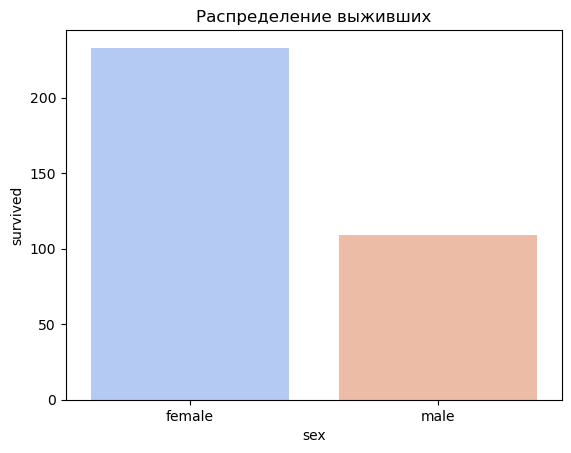

<Figure size 600x400 with 0 Axes>

In [298]:
#Отобразим информацию по кол-ву выживших в разрезе пола на графике
sns.barplot(x='sex', y='survived', data=dataset_survived, hue='sex', palette='coolwarm', legend=False)
plt.title('Распределение выживших')
plt.figure(figsize=(6, 4))

In [290]:
#Посчитаем кол-во выживших и погибших мужчин и женщин
df = titanic_dataset.copy()
df['survival_status'] = np.where(df['survived'] == 1, 'survived', 'not survived')
survival_status = df.groupby(['sex', 'survival_status'], as_index = True)\
                    .agg({'survived' : 'count'})                              
survival_status

survived
sex    survival_status          
female not survived           81
       survived              233
male   not survived          468
       survived              109

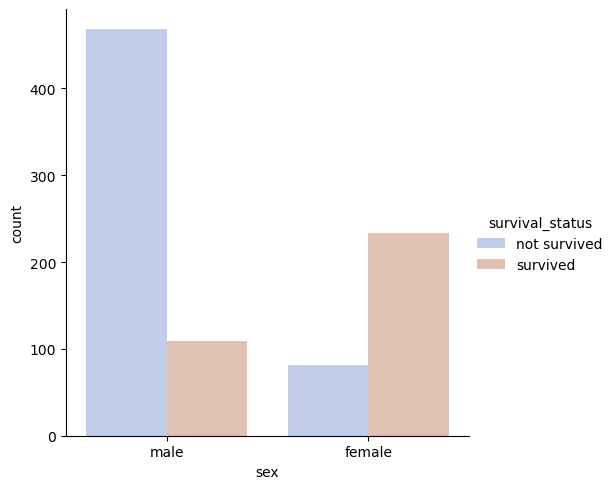

In [300]:
#Отобразим информацию по кол-ву выживших и погибших в разрезе пола на графике
sns.catplot(data = df, hue = 'survival_status', x = 'sex', kind = 'count', saturation = 0.5, palette='coolwarm')

In [304]:
#Посчитаем средний процент выживших по полу
round(df[['sex', 'survived']].groupby('sex', as_index = False).mean(),2)

,sex,survived
0,female,0.74
1,male,0.19


<Axes: xlabel='sex', ylabel='survived'>

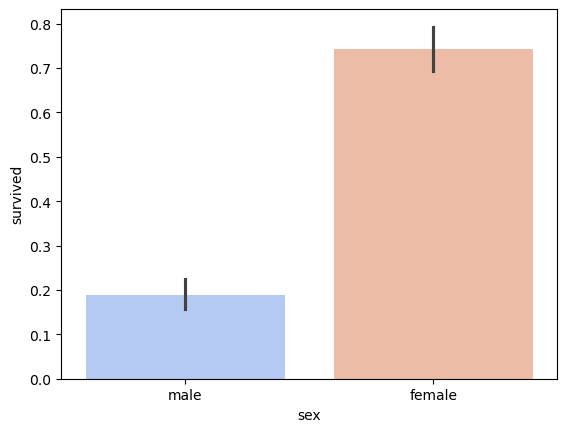

In [310]:
#Отобразим на графике процент выживших по полу
sns.barplot(x='sex', y='survived', hue='sex', data=df, palette='coolwarm', legend=False)

### 📌 Вывод
Женщины имели значительно более высокий шанс на выживание, чем мужчины. Среди 314 женщин на борту 233 (≈74%) выжили, в то время как 81 (≈26%) не выжили. Это подтверждает правило «Женщины и дети – первыми», которое применялось при эвакуации.

Мужчины, наоборот, имели гораздо меньшие шансы на спасение. Из 577 мужчин выжили только 109 (≈19%), тогда как 468 (≈81%) погибли. Это связано с тем, что приоритет в посадке в спасательные шлюпки отдавался женщинам и детям.

Общее соотношение выживших и погибших также демонстрирует значительное гендерное неравенство в шансах на спасение. Женщины выживали примерно в 3,9 раза чаще, чем мужчины (74% против 19%).

In [321]:
#Посчитаем кол-во билетов по классам
df.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [326]:
#Посчитаем кол-во выживших/погибших по классам
df.groupby('pclass').survived.value_counts()

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [336]:
#Посчитаем средний процент выживаемости по классам
round(df[['pclass', 'survived']].groupby(['pclass'], as_index = False).mean(), 2)

,pclass,survived
0,1,0.63
1,2,0.47
2,3,0.24


<Axes: xlabel='pclass', ylabel='survived'>

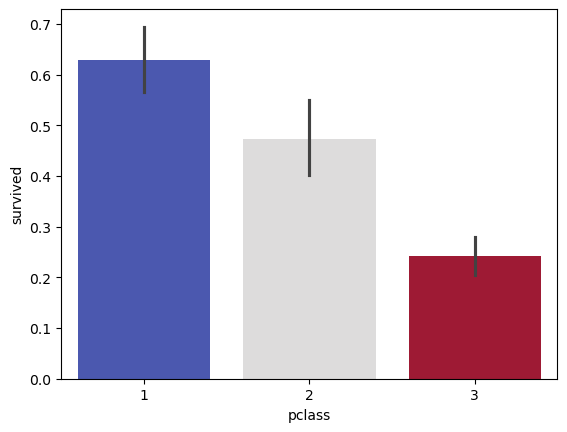

In [340]:
#Отобразим средний процент выживаемости по классам на графике
sns.barplot(x='pclass', y='survived', data = df, palette='coolwarm', hue='pclass', legend=False)

### 📌 Вывод
Пассажиры 1-го класса имели наибольшие шансы на выживание – 63% смогли спастись. Это объясняется тем, что каюты 1-го класса находились ближе к палубе, а также высоким социальным статусом пассажиров, которые первыми получали доступ к спасательным шлюпкам.

Во 2-м классе процент выживших составил 47%, что ниже, чем в 1-м классе, но все же значительно выше, чем у пассажиров 3-го класса. Это говорит о том, что шансы на спасение в среднем классе были умеренными, но уступали привилегированному 1-му классу.

Пассажиры 3-го класса имели наименьшие шансы на спасение – выжило только 24%. Это связано с тем, что их каюты находились в нижних палубах, что затрудняло эвакуацию. Кроме того, приоритет при спасении отдавался пассажирам более высоких классов.

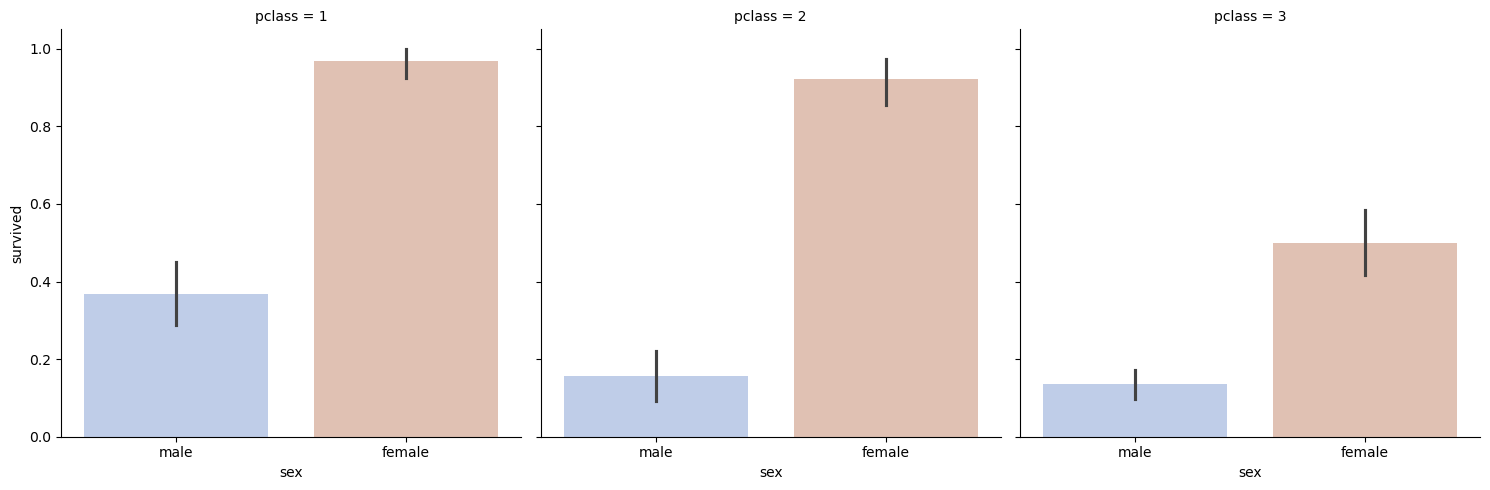

In [345]:
#Нарисуем график соотношения выживших мужчин к выжившим женщинам по классам
sns.catplot(data = df, y = 'survived', x = 'sex', col = 'pclass', kind = 'bar', saturation = 0.5, palette='coolwarm', hue='sex', legend=False)

## Выживаемость в зависимости от возраста

Добавим группировку по возрастным диапазонам, чтобы лучше визуализировать данные.

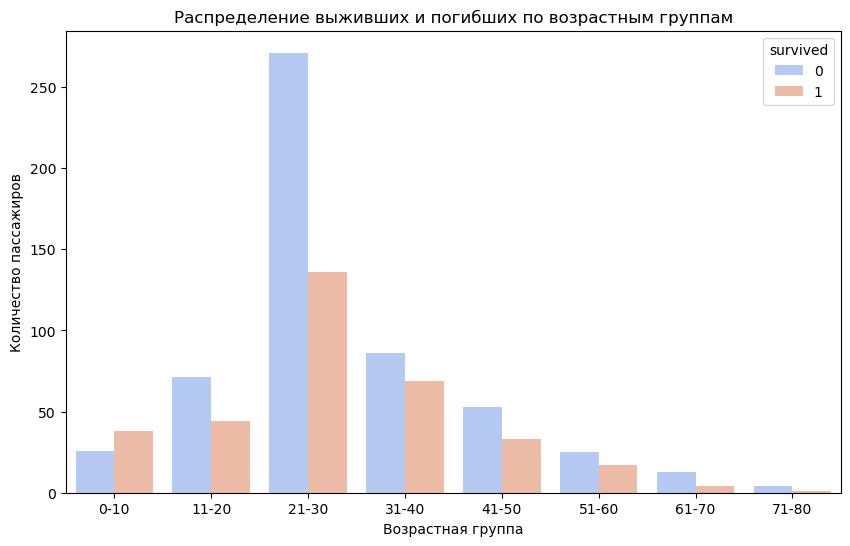

In [377]:
# Создаем возрастные группы
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_dataset['age_group'] = pd.cut(titanic_dataset['age'], bins=bins, labels=labels)

# Строим столбчатый график распределения выживших и погибших по возрастным группам
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=titanic_dataset, palette='coolwarm')

plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.title('Распределение выживших и погибших по возрастным группам')
plt.show()


### 📌 Вывод

Наибольшее количество пассажиров находилось в возрастной группе 20-40 лет.

Дети (0-10 лет) выживали значительно чаще, чем взрослые.

В возрастных группах 50+ лет количество выживших резко уменьшалось.

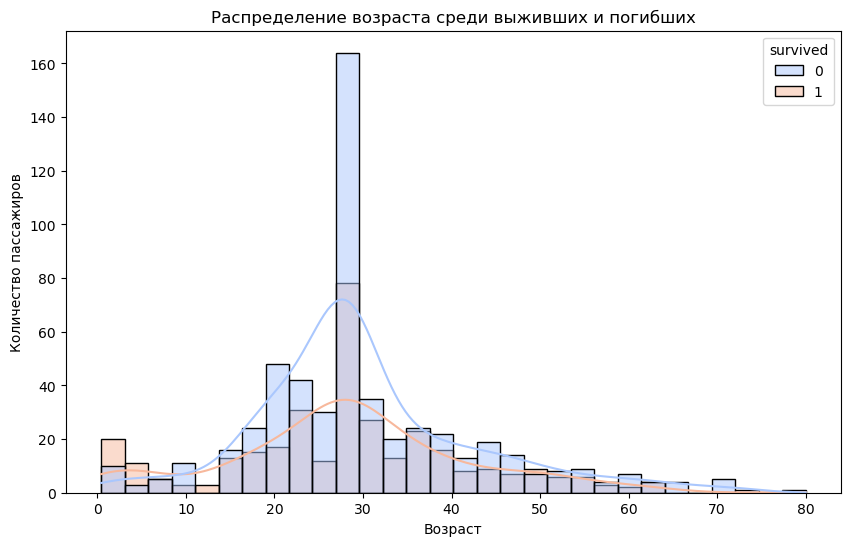

In [386]:
#Построим гистограмму, показывающую, как распределяются выжившие и погибшие по возрасту.
plt.figure(figsize=(10, 6))
sns.histplot(titanic_dataset, x='age', hue='survived', bins=30, kde=True, palette='coolwarm')

plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста среди выживших и погибших')
plt.show()


### 📌 Вывод

Дети до 10 лет чаще выживали.

Взрослые пассажиры 20-40 лет имели как высокий, так и низкий шанс выживания.

Среди пожилых пассажиров (60+ лет) количество выживших было минимальным.

# 📑 Заключение
Таким образом, пол пассажира был одним из ключевых факторов, определявших вероятность выживания. Женщины имели преимущество при эвакуации, в то время как мужчины, особенно те, кто путешествовал во 2-м и 3-м классах, сталкивались с крайне низкими шансами на спасение.
Возраст был важным фактором выживания: дети выживали чаще. Максимальная смертность наблюдается среди пожилых пассажиров (60+ лет). Группа 20-40 лет — наиболее многочисленная, с разной долей выживших.

Также важно отметить, что выживаемость пассажиров Титаника сильно зависела от класса билета. Пассажиры 1-го класса имели почти в 3 раза больше шансов на спасение, чем пассажиры 3-го класса (63% против 24%). Эти данные подтверждают социальное неравенство при эвакуации, где высокий статус и лучшие условия на борту давали преимущество в борьбе за выживание.
